In [1]:
import numpy as np 
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
flipkart_data = pd.read_csv(r"C:\Users\lakshmilokeswari\Downloads\venu eda proj\the last\EDA 26TH NIGHT",index_col=0)

In [3]:
flipkart_data

,Brand,Model,Color,Ram,Rom,Display_size_cm,Front Camera,Back Camera,Guaranty for phone,Processor,Guaranty for Accessories months,Reviews,Ratings,Battery,Price
0,Samsung,Galaxy A35 5G,Awesome Iceblue,8,256,16.76,13,50MP + 8MP + 5MP,1,Samsung Exynos 1380,6.0,"2,991","451,043",5000,19999
1,Samsung,Galaxy A35 5G,Awesome Lilac,8,128,16.76,13,50MP + 8MP + 5MP,1,Samsung Exynos 1380,6.0,"2,991","451,043",5000,17999
2,Samsung,Galaxy A35 5G,Awesome Navy,8,256,16.76,13,50MP + 8MP + 5MP,1,Samsung Exynos 1380,6.0,"2,991","451,043",5000,19999
3,Samsung,Galaxy A35 5G,Awesome Iceblue,8,128,16.76,13,50MP + 8MP + 5MP,1,Samsung Exynos 1380,6.0,"2,991","451,043",5000,17999
4,Realme,P3 Pro 5G,Nebula Glow,8,256,17.35,16,50MP + 2MP,1,7s Gen 3 Mobile Platform,6.0,"1,037","413,830",6000,21999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,Redmi,13 5G,Black Diamond,8,128,17.27,13,50MP + 2MP,1,Qualcomm Snapdragon 439,6.0,714,"212,973",5030,12390
412,Realme,15 Pro 5G,Velvet Green,8,256,17.02,50,50MP + 50MP,1,Snapdragon 7 Gen 4,6.0,505,"35,775",7000,33999
413,Samsung,Galaxy F36 5G,Red,8,256,17.02,13,50MP + 8MP + 2MP,1,Samsung Exynos 1380,6.0,218,"23,047",5000,17499
414,Samsung,Galaxy S24 5G Snapdragon,Onyx Black,8,128,16.74,12,50MP + 12MP,1,8 Gen 3,6.0,"2,327","642,929",4000,39999


In [204]:
flipkart_data.duplicated().sum()

np.int64(0)

In [4]:
flipkart_data.drop_duplicates(inplace = True)

In [5]:
flipkart_data

,Brand,Model,Color,Ram,Rom,Display_size_cm,Front Camera,Back Camera,Guaranty for phone,Processor,Guaranty for Accessories months,Reviews,Ratings,Battery,Price
0,Samsung,Galaxy A35 5G,Awesome Iceblue,8,256,16.76,13,50MP + 8MP + 5MP,1,Samsung Exynos 1380,6.0,"2,991","451,043",5000,19999
1,Samsung,Galaxy A35 5G,Awesome Lilac,8,128,16.76,13,50MP + 8MP + 5MP,1,Samsung Exynos 1380,6.0,"2,991","451,043",5000,17999
2,Samsung,Galaxy A35 5G,Awesome Navy,8,256,16.76,13,50MP + 8MP + 5MP,1,Samsung Exynos 1380,6.0,"2,991","451,043",5000,19999
3,Samsung,Galaxy A35 5G,Awesome Iceblue,8,128,16.76,13,50MP + 8MP + 5MP,1,Samsung Exynos 1380,6.0,"2,991","451,043",5000,17999
4,Realme,P3 Pro 5G,Nebula Glow,8,256,17.35,16,50MP + 2MP,1,7s Gen 3 Mobile Platform,6.0,"1,037","413,830",6000,21999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,Redmi,13 5G,Black Diamond,8,128,17.27,13,50MP + 2MP,1,Qualcomm Snapdragon 439,6.0,714,"212,973",5030,12390
412,Realme,15 Pro 5G,Velvet Green,8,256,17.02,50,50MP + 50MP,1,Snapdragon 7 Gen 4,6.0,505,"35,775",7000,33999
413,Samsung,Galaxy F36 5G,Red,8,256,17.02,13,50MP + 8MP + 2MP,1,Samsung Exynos 1380,6.0,218,"23,047",5000,17499
414,Samsung,Galaxy S24 5G Snapdragon,Onyx Black,8,128,16.74,12,50MP + 12MP,1,8 Gen 3,6.0,"2,327","642,929",4000,39999


In [6]:
flipkart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, 0 to 415
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brand                            416 non-null    object 
 1   Model                            416 non-null    object 
 2   Color                            416 non-null    object 
 3   Ram                              416 non-null    int64  
 4   Rom                              416 non-null    int64  
 5   Display_size_cm                  416 non-null    float64
 6   Front Camera                     416 non-null    int64  
 7   Back Camera                      416 non-null    object 
 8   Guaranty for phone               416 non-null    int64  
 9   Processor                        416 non-null    object 
 10  Guaranty for Accessories months  416 non-null    float64
 11  Reviews                          416 non-null    object 
 12  Ratings                    

In [7]:
# Clean Ratings column
flipkart_data["Ratings"] = flipkart_data["Ratings"].astype(str)
flipkart_data["Ratings"] = flipkart_data["Ratings"].str.replace(",", "", regex=True)
flipkart_data["Ratings"] = pd.to_numeric(flipkart_data["Ratings"], errors='coerce').fillna(0).astype(int)

# Clean Reviews column
flipkart_data["Reviews"] = flipkart_data["Reviews"].astype(str)
flipkart_data["Reviews"] = flipkart_data["Reviews"].str.replace(",", "", regex=True)
flipkart_data["Reviews"] = pd.to_numeric(flipkart_data["Reviews"], errors='coerce').fillna(0).astype(int)

In [8]:
flipkart_data

,Brand,Model,Color,Ram,Rom,Display_size_cm,Front Camera,Back Camera,Guaranty for phone,Processor,Guaranty for Accessories months,Reviews,Ratings,Battery,Price
0,Samsung,Galaxy A35 5G,Awesome Iceblue,8,256,16.76,13,50MP + 8MP + 5MP,1,Samsung Exynos 1380,6.0,2991,451043,5000,19999
1,Samsung,Galaxy A35 5G,Awesome Lilac,8,128,16.76,13,50MP + 8MP + 5MP,1,Samsung Exynos 1380,6.0,2991,451043,5000,17999
2,Samsung,Galaxy A35 5G,Awesome Navy,8,256,16.76,13,50MP + 8MP + 5MP,1,Samsung Exynos 1380,6.0,2991,451043,5000,19999
3,Samsung,Galaxy A35 5G,Awesome Iceblue,8,128,16.76,13,50MP + 8MP + 5MP,1,Samsung Exynos 1380,6.0,2991,451043,5000,17999
4,Realme,P3 Pro 5G,Nebula Glow,8,256,17.35,16,50MP + 2MP,1,7s Gen 3 Mobile Platform,6.0,1037,413830,6000,21999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,Redmi,13 5G,Black Diamond,8,128,17.27,13,50MP + 2MP,1,Qualcomm Snapdragon 439,6.0,714,212973,5030,12390
412,Realme,15 Pro 5G,Velvet Green,8,256,17.02,50,50MP + 50MP,1,Snapdragon 7 Gen 4,6.0,505,35775,7000,33999
413,Samsung,Galaxy F36 5G,Red,8,256,17.02,13,50MP + 8MP + 2MP,1,Samsung Exynos 1380,6.0,218,23047,5000,17499
414,Samsung,Galaxy S24 5G Snapdragon,Onyx Black,8,128,16.74,12,50MP + 12MP,1,8 Gen 3,6.0,2327,642929,4000,39999


In [210]:
flipkart_data.to_csv("EDA 26TH NIGHT-2")

In [211]:
import os
os.getcwd()

'C:\\Users\\lakshmilokeswari\\Downloads\\4410536-Vizual_Analysis (1)'

In [9]:
flipkart_data=pd.read_csv(r"C:\Users\lakshmilokeswari\Downloads\venu eda proj\the last\EDA 26TH NIGHT-2",index_col=0)

In [10]:
flipkart_data

,Brand,Model,Color,Ram,Rom,Display_size_cm,Front Camera,Back Camera,Guaranty for phone,Processor,Guaranty for Accessories months,Reviews,Ratings,Battery,Price
0,Samsung,Galaxy A35 5G,Awesome Iceblue,8,256,16.76,13,50MP + 8MP + 5MP,1,Samsung Exynos 1380,6.0,2991,451043,5000,19999
1,Samsung,Galaxy A35 5G,Awesome Lilac,8,128,16.76,13,50MP + 8MP + 5MP,1,Samsung Exynos 1380,6.0,2991,451043,5000,17999
2,Samsung,Galaxy A35 5G,Awesome Navy,8,256,16.76,13,50MP + 8MP + 5MP,1,Samsung Exynos 1380,6.0,2991,451043,5000,19999
3,Samsung,Galaxy A35 5G,Awesome Iceblue,8,128,16.76,13,50MP + 8MP + 5MP,1,Samsung Exynos 1380,6.0,2991,451043,5000,17999
4,Realme,P3 Pro 5G,Nebula Glow,8,256,17.35,16,50MP + 2MP,1,7s Gen 3 Mobile Platform,6.0,1037,413830,6000,21999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,Redmi,13 5G,Black Diamond,8,128,17.27,13,50MP + 2MP,1,Qualcomm Snapdragon 439,6.0,714,212973,5030,12390
412,Realme,15 Pro 5G,Velvet Green,8,256,17.02,50,50MP + 50MP,1,Snapdragon 7 Gen 4,6.0,505,35775,7000,33999
413,Samsung,Galaxy F36 5G,Red,8,256,17.02,13,50MP + 8MP + 2MP,1,Samsung Exynos 1380,6.0,218,23047,5000,17499
414,Samsung,Galaxy S24 5G Snapdragon,Onyx Black,8,128,16.74,12,50MP + 12MP,1,8 Gen 3,6.0,2327,642929,4000,39999


In [11]:
flipkart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, 0 to 415
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brand                            416 non-null    object 
 1   Model                            416 non-null    object 
 2   Color                            416 non-null    object 
 3   Ram                              416 non-null    int64  
 4   Rom                              416 non-null    int64  
 5   Display_size_cm                  416 non-null    float64
 6   Front Camera                     416 non-null    int64  
 7   Back Camera                      416 non-null    object 
 8   Guaranty for phone               416 non-null    int64  
 9   Processor                        416 non-null    object 
 10  Guaranty for Accessories months  416 non-null    float64
 11  Reviews                          416 non-null    int64  
 12  Ratings                    

In [246]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
                                          **** VISUALIZATIONS*****

In [315]:

#Visual Analysis:
#1.Univariate Analysis
#2.BiVariate Analysis
#3.Multi-Variate Analysis

In [ ]:
## Univariate


In [ ]:
#Categorical

In [152]:
flipkart_data["Brand"].value_counts()

Brand
Realme     124
Samsung     97
Vivo        72
Redmi       63
Oppo        60
Name: count, dtype: int64

In [154]:
flipkart_data["Brand"].value_counts(normalize = True) * 100
#It was done to normalize the value in to percentage format


Brand
Realme     29.807692
Samsung    23.317308
Vivo       17.307692
Redmi      15.144231
Oppo       14.423077
Name: proportion, dtype: float64

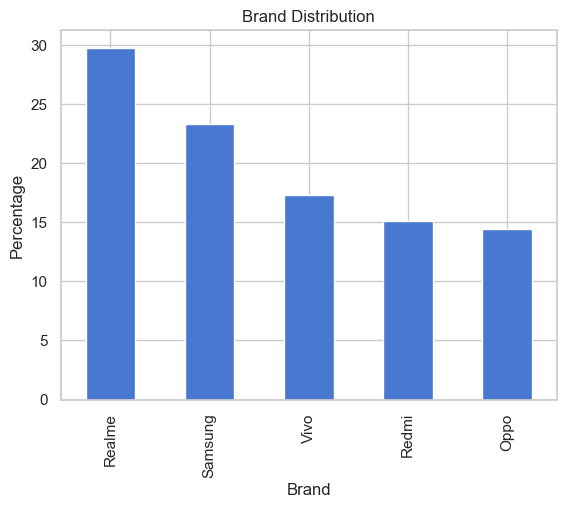

In [163]:
(flipkart_data["Brand"].value_counts(normalize = True) * 100).plot.bar()
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('Percentage')
plt.show()
#Bar plot for the brand column

In [ ]:
#Realme has the highest share (~30%), indicating it is the most common or popular brand among the users/customers in this dataset.

#Samsung follows with around 23%, showing a strong market presence but still behind Realme.

#Vivo, Redmi, and Oppo have comparatively lower shares (14–17%), suggesting moderate to low representation.

#The data indicates a brand concentration trend, where Realme and Samsung together account for over half of the total distribution.

##This could imply brand preference, availability, or marketing influence favoring these top brands.

In [158]:
flipkart_data["Model"].value_counts(normalize = True) * 100

Model
Galaxy A35 5G                                     2.884615
13 5G                                             2.884615
Galaxy A16 5G                                     2.403846
15 5G                                             2.403846
14 Pro+ 5G                                        2.403846
Note 14 5G                                        2.163462
15 Pro 5G                                         1.923077
Y19 5G                                            1.923077
P3 5G                                             1.682692
Galaxy A17 5G                                     1.682692
Note-14 Pro+ 5G                                   1.682692
15T 5G                                            1.442308
Galaxy M35 5G                                     1.442308
T4 Pro 5G                                         1.442308
V60 5G                                            1.442308
14C 5G                                            1.442308
14x 5G                                            

In [159]:
flipkart_data["Back Camera"].value_counts(normalize = True) * 100

Back Camera
50MP + 2MP                    30.528846
50MP + 8MP                     6.730769
50MP + 8MP + 2MP               6.009615
50MP                           5.288462
50MP + 50MP + 8MP              5.048077
108MP + 2MP                    5.048077
50MP + 5MP + 2MP               4.807692
50MP + 8MP + 50MP              4.567308
50MP + 50MP                    3.846154
32MP                           3.605769
50MP + 8MP + 5MP               2.884615
8MP                            2.403846
50MP + 12MP                    1.442308
13MP + 0.08MP                  1.442308
50MP + 2MP + 50MP              1.442308
200MP + 50MP + 50MP + 10MP     1.442308
200MP + 8MP                    1.201923
32MP + 2MP                     1.201923
50MP + 50MP + 50MP + 8MP       0.961538
50MP + 0.08MP                  0.961538
50MP + 2 MP                    0.961538
50MP + 12MP + 5MP              0.721154
50MP + 10MP + 12MP             0.721154
50MP + 12MP + 10MP             0.721154
50MP + 12MP + 8MP           

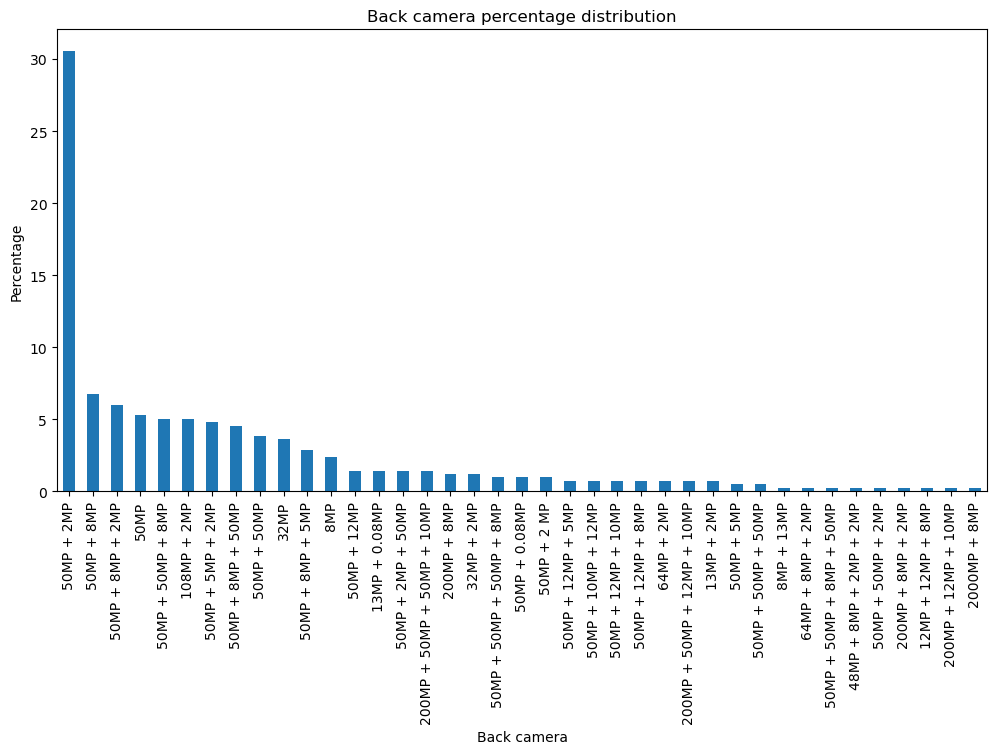

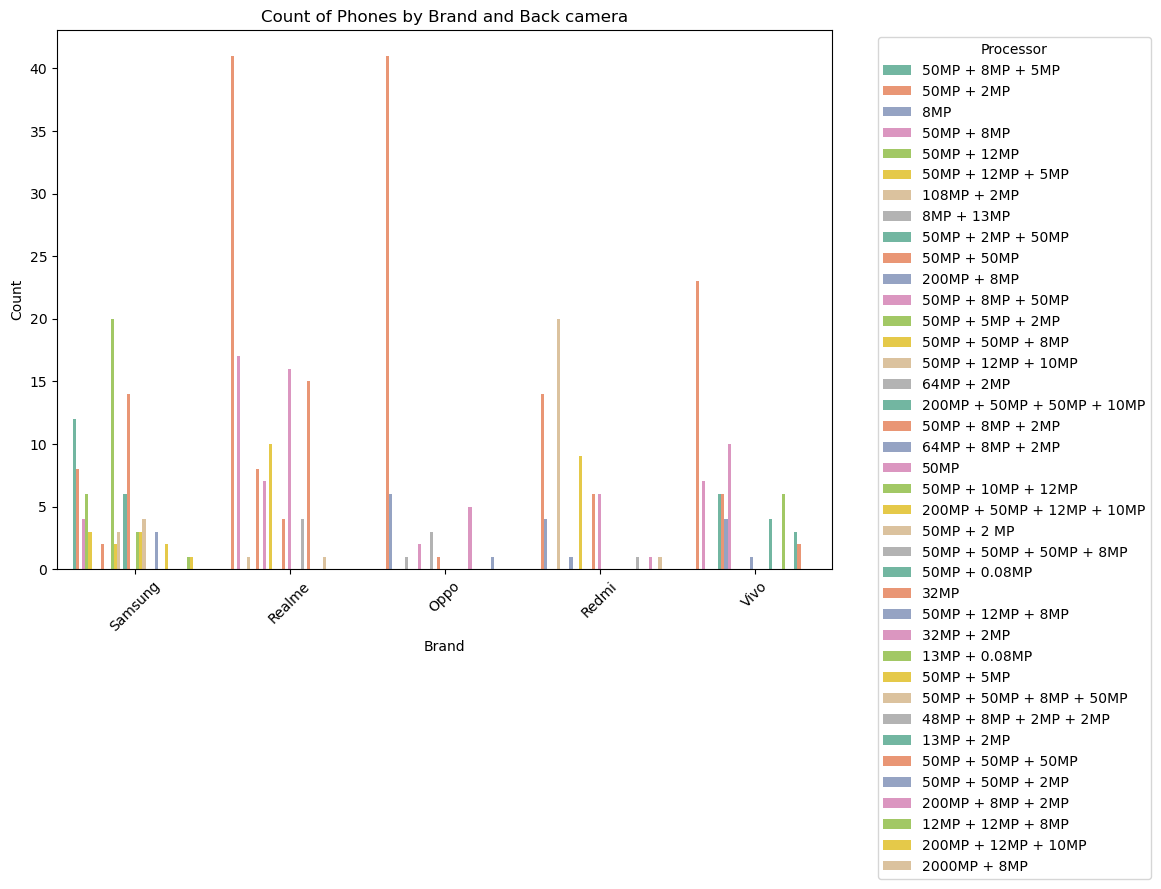

In [12]:
plt.figure(figsize=(12, 6))
(flipkart_data["Back Camera"].value_counts(normalize = True) * 100).plot.bar()
plt.title('Back camera percentage distribution')
plt.xlabel('Back camera')
plt.ylabel('Percentage')
plt.show()

plt.figure(figsize=(10,7))
sns.countplot(
    data=flipkart_data,
    x="Brand",
    hue="Back Camera",
    palette="Set2"
)
plt.title("Count of Phones by Brand and Back camera")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Processor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [164]:
#The most common back camera setup is “50MP + 2MP”, contributing to over 30% of all entries — indicating that dual-camera combinations led by a 50MP main sensor are dominant in this dataset.

#Other popular configurations include “50MP + 8MP”, “50MP + 8MP + 2MP”, and “50MP only”, each holding smaller but noticeable shares (around 5–7%).

#Beyond these top combinations, the remaining setups show a long tail distribution, where each unique combination contributes very little to the total percentage.

#This suggests that the market is heavily concentrated around 50MP-based camera setups, while higher-resolution combinations (like 64MP, 108MP, or 200MP) are relatively rare.

#The pattern highlights a standardization trend in the smartphone segment — manufacturers prefer optimizing 50MP sensors with supporting secondary lenses rather than focusing solely on higher megapixel counts.

In [ ]:
#Realme and Redmi dominate in the number of models offered.

#Both brands show peaks around 40 phones, making them the most diversified in terms of camera configurations.

#Samsung comes next with a moderate range of models, but more variety in processor (camera) types, as evident from the multiple small bars.

#Vivo has a smaller but balanced range, showing consistency rather than high variation.

#Oppo has the least count overall, suggesting fewer models or limited configuration options.

In [167]:
flipkart_data["Guaranty for Accessories months"].value_counts(normalize = True) *100

Guaranty for Accessories months
6.0    100.0
Name: proportion, dtype: float64

In [169]:
flipkart_data["Ram"].mode()[0]
#mode can be perfect for ram as it doesn't contain any float values.


np.int64(8)

In [172]:
flipkart_data["Ram"].std()
#to check variance from mean or center



2.4044868469633283

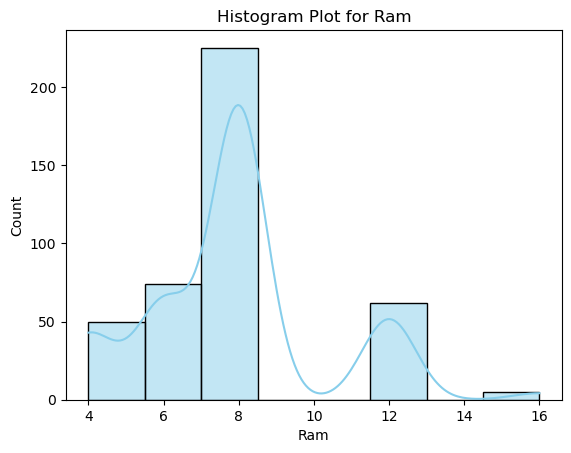

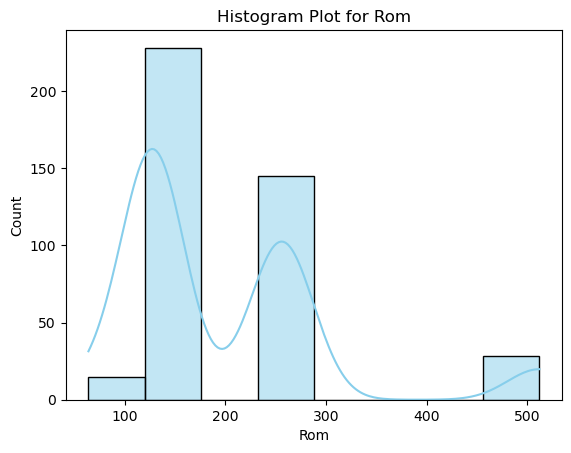

In [13]:
cols=["Ram","Rom"]

for col in cols:
    sns.histplot(flipkart_data[col], kde=True, bins=8, color='skyblue')
    plt.title(f"Histogram Plot for {col}")
    plt.show()




In [ ]:
The most common RAM size among phones is 8 GB, with a significant peak exceeding 200 phones.
→ This indicates that 8 GB RAM is the standard or most preferred configuration for most models.

There are smaller peaks around 6 GB and 12 GB, suggesting secondary popular configurations for mid-range and upper-mid phones.

Lower RAM values (4 GB and below) and higher-end values (16 GB and above) are less frequent, implying they belong to entry-level and premium segments respectively.

The distribution is right-skewed, meaning most devices have moderate RAM (6–8 GB), while only a few have very high RAM capacities.

Insights

The market is dominated by 8 GB RAM smartphones, striking a balance between performance and cost.

6 GB models cater to budget-conscious users, while 12 GB+ models target power users or flagship phones.

The dip between 8 GB and 12 GB suggests fewer options around 10 GB, likely due to standardization around common tiers (6 GB, 8 GB, 12 GB).

4. Conclusion

Most smartphones in the dataset come with 8 GB RAM, highlighting it as the mainstream standard. Smaller groups of 6 GB and 12 GB models indicate diversification across budget and premium segments, while extreme RAM capacities are rare.

In [ ]:
Key Observations

The most common ROM capacity is 128 GB, with the highest count (above 220 phones).
→ This indicates that 128 GB has become the standard storage option for most modern smartphones.

The second most frequent group is 256 GB, showing a significant number of phones (around 140–150).
→ This suggests a trend toward higher storage models, especially in mid to premium ranges.

Smaller peaks are visible at 512 GB, while lower capacities (64 GB and below) have minimal representation.
→ This indicates a decline in low-storage phones, as 64 GB is no longer the market norm.

The distribution is slightly right-skewed, showing more phones with moderate storage (128–256 GB) and fewer at the extremes.

3. Insights

128 GB dominates the market as the mainstream ROM configuration, balancing cost and utility.

256 GB models serve as premium mid-tier phones, appealing to users needing more space for media and apps.

512 GB phones are rare and likely represent flagship or high-end devices.

The shift away from 64 GB indicates growing storage expectations in newer smartphones.

4. Conclusion

The smartphone market is centered around 128 GB and 256 GB storage options, showing a clear consumer preference for moderate to high storage capacities. Low-storage phones are now uncommon, and 512 GB models exist mainly in the premium segment, emphasizing the market’s move toward higher capacity devices.

In [181]:
flipkart_data["Display_size_cm"].mean()

np.float64(17.058221153846155)

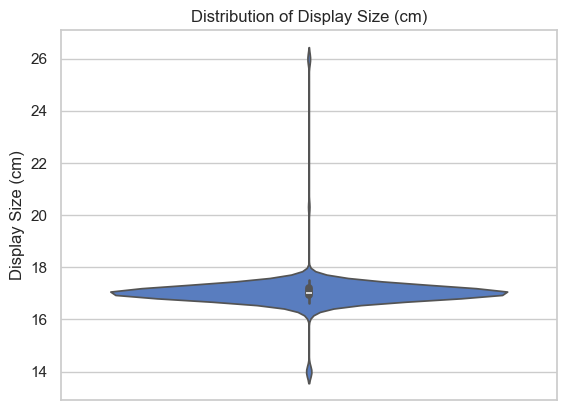

In [183]:
sns.violinplot(y=flipkart_data['Display_size_cm'])
plt.title('Distribution of Display Size (cm)')
plt.ylabel('Display Size (cm)')
plt.show()

In [ ]:
The violin plot illustrates the distribution of smartphone display sizes available in the dataset.

The mean display size is approximately 17.05 cm, which translates to about 6.7 inches, aligning with the standard size of modern smartphones.

The distribution is slightly concentrated between 16 cm and 18 cm, indicating that most smartphones in the market fall within this range.

The median lies close to the mean, showing that the data is fairly symmetrical with no strong skew.

A few outliers are visible at both extremes:

Smaller displays (~14 cm) likely correspond to compact or older models.

Larger displays (~25 cm) may represent foldable devices or tablets listed as smartphones.


The narrow tails indicate limited variation outside the main cluster, suggesting that manufacturers largely focus on display sizes around the 17 cm mark.


Overall, the smartphone market appears to be centered around medium-to-large displays, with a consistent design trend favoring screens around 6.5–6.8 inches.

In [ ]:
#Most smartphones have display sizes around 17 cm (≈6.7 inches), showing a consistent trend toward medium-to-large screens.
The distribution is fairly symmetrical with few outliers, mainly smaller older models and larger foldable devices.
Overall, the market is centered around 16–18 cm display sizes.

In [186]:
flipkart_data["Front Camera"].mode()[0]


np.int64(16)

In [187]:
flipkart_data["Front Camera"].std()

12.891965728785422

C:\Users\lakshmilokeswari\AppData\Local\Temp\ipykernel_16976\1926136310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


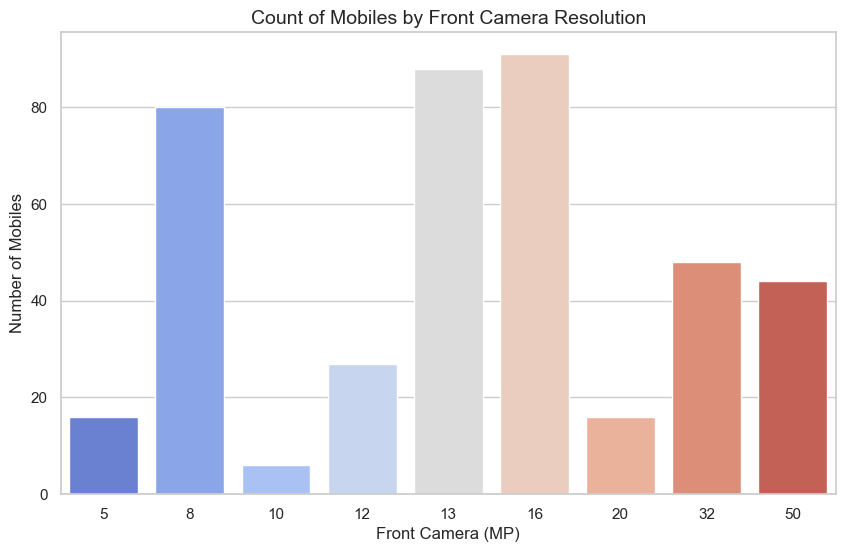

In [191]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=flipkart_data,
    x="Front Camera",
    palette="coolwarm"
)
plt.title("Count of Mobiles by Front Camera Resolution", fontsize=14)
plt.xlabel("Front Camera (MP)")
plt.ylabel("Number of Mobiles")
plt.show()

In [192]:
#The most common resolutions are 8 MP, 13 MP, and 16 MP, meaning most phones fall in the 8–16 MP range — typical for mid-range and budget smartphones.

#32 MP and 50 MP front cameras appear in premium models, reflecting a growing focus on high-quality selfies and video calls.

#5 MP and 10 MP are the least common, mostly found in older or entry-level devices.

#Overall, the smartphone market centers around 8–16 MP front cameras, with higher-end phones moving toward 32–50 MP options.

In [271]:
flipkart_data["Guaranty for phone"].mean()

np.float64(1.0)

In [272]:
flipkart_data["Guaranty for phone"].std()

0.0

In [273]:
flipkart_data["Battery"].max()

7300

In [274]:
flipkart_data["Battery"].median()

5600.0

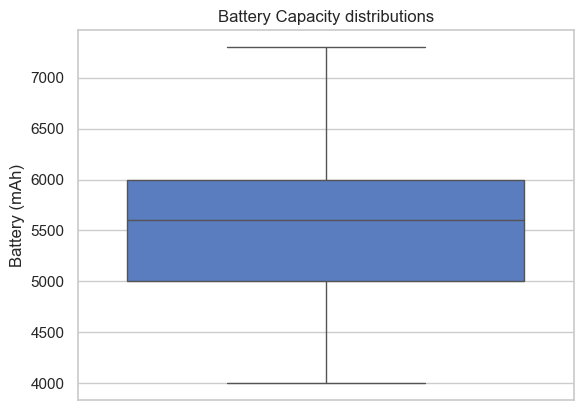

In [276]:
sns.boxplot(y=flipkart_data['Battery'])
plt.title("Battery Capacity distributions")
plt.ylabel("Battery (mAh)")
plt.show()

In [ ]:
#The boxplot visualizes the distribution of smartphone battery capacities (mAh) in the dataset.

The median battery capacity is around 5600 mAh, showing that most modern smartphones offer strong battery performance.

The interquartile range (IQR) spans roughly from 5000 mAh to 6000 mAh, indicating that the majority of phones lie within this range.

A few devices have capacities as low as around 4000 mAh, likely older or budget models.

The upper whisker extends beyond 7000 mAh, suggesting a few phones (often gaming or rugged models) have high-capacity batteries for extended usage.

The distribution shows slight right skewness, meaning there are some models with exceptionally large batteries but most stay near the 5000–6000 mAh mark.

In [277]:
flipkart_data["Price"].median()

19974.0

In [278]:
iqr_price = flipkart_data['Price'].quantile(0.75) - flipkart_data['Price'].quantile(0.25)

In [279]:
iqr_price
#price variance from central tendency

np.float64(14282.0)

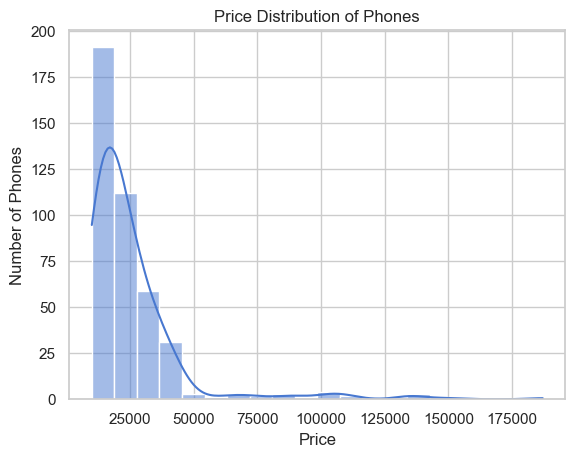

In [280]:
sns.histplot(flipkart_data['Price'], kde=True, bins=20)
plt.title("Price Distribution of Phones")
plt.xlabel("Price")
plt.ylabel("Number of Phones")
plt.show()


In [ ]:
#1.Right-Skewed Distribution: Most phones are priced at the lower end, with a few expensive models extending the tail.


#2. Dominant Price Range: The majority of phones fall between ₹10,000 and ₹30,000, making this the most competitive and popular segment.


#3. Premium Segment: Phones priced above ₹75,000 are rare, indicating a small luxury market.


#4. Consumer Behavior: Customers on Flipkart are likely price-sensitive, favoring affordable options.


#5. Business Implication: Brands targeting the budget and mid-range segments can capture a larger market share, while high-end phones serve niche buyers.


In [ ]:
#Bivariate Vizual Analysis:
#Numerical vs Numerical
#Categorical vs Categorical
#Numerical vs Categorical
#1. Numerical vs Numerical:

  #   Scatter Plot
  #   Joint Plot
#2. Categorica vs Categorical:

  #   Count Plot
#3. Numerical vs Categorical:

  #   Bar Plot
  #   Box Plot
  #   Violin Plot
  #   Displot

In [ ]:
## Bivariate / Multivariate

In [282]:
flipkart_data.groupby("Brand")["Price"].mean().sort_values(ascending = False)

Brand
Samsung    35654.649485
Vivo       26798.180556
Realme     22050.354839
Oppo       21540.100000
Redmi      17147.111111
Name: Price, dtype: float64

In [283]:
flipkart_data.groupby("Brand")["Ram"].median().sort_values(ascending = False)
#Median for the Ram based on brand

Brand
Oppo       8.0
Realme     8.0
Redmi      8.0
Samsung    8.0
Vivo       8.0
Name: Ram, dtype: float64

In [285]:
flipkart_data.groupby('Brand')['Rom'].agg(lambda x: x.mode().iloc[0]).sort_values(ascending = False)

Brand
Oppo       128
Realme     128
Redmi      128
Samsung    128
Vivo       128
Name: Rom, dtype: int64

In [286]:
flipkart_data.groupby("Brand")["Display_size_cm"].mean().sort_values(ascending = False)

Brand
Samsung    17.200825
Realme     17.068871
Vivo       17.058611
Oppo       16.974167
Redmi      16.897302
Name: Display_size_cm, dtype: float64

In [287]:
flipkart_data.groupby("Brand")["Front Camera"].median().sort_values(ascending = False)
#Higest pixel for Front Camera provides by the vivi Company


Brand
Vivo       32.0
Realme     16.0
Redmi      13.0
Samsung    13.0
Oppo        8.0
Name: Front Camera, dtype: float64

In [290]:
flipkart_data.groupby("Brand")["Battery"].median().sort_values(ascending = False)
#The shortest Median for batteries is 5000 mAh by samsung

Brand
Oppo       6000.0
Realme     6000.0
Vivo       6000.0
Redmi      5160.0
Samsung    5000.0
Name: Battery, dtype: float64

In [291]:
pd.pivot_table(flipkart_data, values='Battery', index='Brand', columns='Ram', aggfunc='median')

Ram,4,6,8,12,16
Brand,,,,,
Oppo,5100.0,6000.0,6000.0,7000.0,NaN
Realme,6000.0,6000.0,6000.0,7000.0,5500.0
Redmi,5160.0,5030.0,5500.0,6200.0,NaN
Samsung,5000.0,5000.0,5000.0,5000.0,NaN
Vivo,5500.0,6000.0,6000.0,6000.0,6500.0


In [292]:
flipkart_data.groupby(['Brand','Model'])['Rom'].agg(['median', 'min', 'max', 'count']).sort_values(by='median', ascending=False)

median  min  max  \
Brand   Model                                                              
Samsung Galaxy Z Fold7 5G                                512.0  512  512   
Redmi   NOTE 14 PRO+ 5G                                  512.0  512  512   
Vivo    X Fold5 5G                                       512.0  512  512   
Samsung Galaxy S25 Ultra 5G                              512.0  256  512   
        Galaxy S25 FE 5G                                 512.0  512  512   
Vivo    V40 Pro 5G                                       512.0  512  512   
Oppo    Reno14 5G                                        384.0  256  512   
Vivo    T4 Ultra 5G                                      384.0  256  512   
Oppo    K13 Turbo Pro 5G                                 256.0  256  256   
        F31 Pro+ 5G                                      256.0  256  256   
Realme  Narzo 80 Pro 5G                                  256.0  256  256   
        GT 7T                                            256.0  256  512   
        GT NEO 3 (150W)                                  256.0  256  256   
        Gt 7                                             256.0  256  512   
        GT 6                                             256.0  256  512   
        15T 5G                                           256.0  128  256   
        P4 Pro 5G                                        256.0  128  256   
        P3 Pro 5G                                        256.0  128  256   
Redmi   Note 13 Pro 5G                                   256.0  256  256   
Realme  13 Pro+ 5G                                       256.0  256  256   
        14 Pro+ 5G                                       256.0  128  512   
        13+ 5G                                           256.0  128  256   
Oppo    K12x 5G with 45W SUPERVOOC Charger In-The-Box    256.0  128  256   
        K13 Turbo 5G                                     256.0  128  256   
Realme  15 Pro 5G                                        256.0  128  512   
        15 5G                                            256.0  256  256   
Samsung Galaxy A36 5G                                    256.0  128  256   
        Galaxy A56 5G                                    256.0  256  256   
        Galaxy M55 5G                                    256.0  256  256   
Redmi   Note-14 Pro+ 5G                                  256.0  128  512   
        Note 14 Pro+ 5G                                  256.0  256  256   
        Note 14 Pro 5G                                   256.0  128  256   
Samsung Galaxy Z Fold6 5G                                256.0  256  256   
        Galaxy S25 5G                                    256.0  256  256   
Vivo    V60 5G                                           256.0  256  512   
        T4 Pro 5G                                        256.0  128  256   
        T4 5G                                            256.0  256  256   
Samsung S25 Ultra 5G                                     256.0  256  256   
        M36 5G                                           256.0  128  256   
Vivo    V50e 5G                                          256.0  128  256   
Samsung Galaxy S24 Ultra 5G                              256.0  256  256   
Vivo    T3 Pro 5G                                        192.0  128  256   
        Y31 Pro 5G                                       192.0  128  256   
        V60e                                             192.0  128  256   
        Y400 Pro 5G                                      192.0  128  256   
        Y400 5G                                          192.0  128  256   
        V50 5G                                           192.0  128  512   
Samsung Galaxy M35 5G                                    192.0  128  256   
Redmi   Note 13 5G                                       192.0  128  256   
Samsung Galaxy A35 5G                                    192.0  128  256   
Oppo    F31 Pro 5G                                       192.0  128  256   
        A5 Pro 5G           

In [293]:
flipkart_data.groupby(['Brand','Model'])['Front Camera'].agg(['median', 'min', 'max', 'count']).sort_values(by='median', ascending=False)

median  min  max  \
Brand   Model                                                              
Oppo    Reno14 5G                                         50.0   50   50   
        Reno13 5G                                         50.0   50   50   
Realme  15x 5G                                            50.0   50   50   
        15T 5G                                            50.0   50   50   
        15 Pro 5G                                         50.0   50   50   
        P4 Pro 5G                                         50.0   50   50   
        15 5G                                             50.0   50   50   
Vivo    V25 5G                                            50.0   50   50   
        V60 5G                                            50.0   50   50   
        V60e                                              50.0   50   50   
        V40 Pro 5G                                        50.0   50   50   
        V50 5G                                            50.0   50   50   
        V50e 5G                                           50.0   50   50   
Realme  GT 6                                              32.0   32   32   
        GT 7T                                             32.0   32   32   
Vivo    Y400 Pro 5G                                       32.0   32   32   
        T4 Ultra 5G                                       32.0   32   32   
        T4 5G                                             32.0   32   32   
Samsung Galaxy A55 5G                                     32.0   32   32   
        Galaxy S21 FE 5G with Snapdragon 888              32.0   32   32   
Realme  13 Pro+ 5G                                        32.0   32   32   
Vivo    T4 Pro 5G                                         32.0   32   32   
        Y400 5G                                           32.0   32   32   
Oppo    F31 Pro 5G                                        32.0   32   32   
Realme  14 Pro+ 5G                                        32.0   32   32   
Oppo    F31 Pro+ 5G                                       32.0   32   32   
Redmi   Note-14 Pro 5G                                    20.0   20   20   
        Note 14 Pro 5G                                    20.0   13   20   
        Note-14 Pro+ 5G                                   20.0   20   20   
Vivo    X Fold5 5G                                        20.0   20   20   
Redmi   Note 14 Pro+ 5G                                   20.0   20   20   
        Note 14 SE 5G                                     20.0   20   20   
Realme  Narzo 80x 5G                                      16.0   16   16   
        P3 5G                                             16.0   16   16   
        Gt 7                                              16.0   16   16   
Vivo    T3 5G                                             16.0   16   16   
Redmi   Note 13 Pro 5G                                    16.0   16   16   
        Note 14 5G                                        16.0   16   16   
Vivo    T3 Pro 5G                                         16.0   16   16   
Realme  Narzo N65 5G                                      16.0   16   16   
        Narzo 80 Pro 5G                                   16.0   16   16   
        GT NEO 3 (150W)                                   16.0   16   16   
        P3 Pro 5G                                         16.0   16   16   
        P3 Ultra 5G                                       16.0   16   16   
        P4 5G                                             16.0   16   16   
        13 5G                                             16.0   16   16   
Oppo    K13 Turbo 5G                                      16.0   16   16   
Realme  Narzo 80 Lite 5G                                  16.0   16   16   
        NARZO 80 Pro 5G                                   16.0   16   16   
        NARZO N65 5G                                      16.0   16   16   
        70 TURBO 5G                                       16.0   16   16   
        13+ 5G              

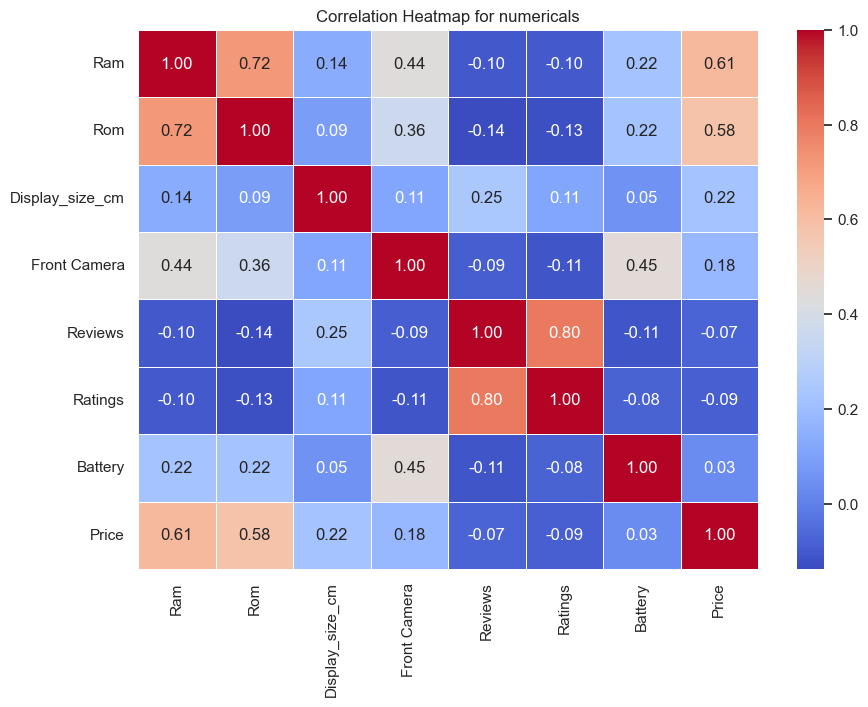

In [296]:
#MULTIVARIATE DISTRIBUTION
plt.figure(figsize=(10,7))
corr_matrix = flipkart_data.drop(columns=['Guaranty for Accessories months','Guaranty for phone']).corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for numericals")
plt.show()

In [ ]:
1. RAM and ROM (0.72)

Strong positive correlation.

Phones with higher RAM tend to have higher ROM (storage).



2. RAM and Price (0.61)

Moderate to strong positive correlation.

As RAM increases, the phone’s price tends to rise.



3. ROM and Price (0.58)

Similar to RAM, higher ROM usually means a higher price — more storage adds to cost.



4. Front Camera and Battery (0.45)

Moderate positive correlation, suggesting that phones with better cameras often come with larger batteries (likely to support power usage).



5. Reviews and Ratings (0.80)

Very strong positive correlation — more reviews are typically associated with higher ratings, showing that popular phones tend to receive better feedback.



6. Display Size vs Price (0.22)

Weak positive correlation, meaning display size has a small effect on pricing.



7. Battery vs Price (0.03)

Almost no correlation — battery capacity doesn’t strongly affect the phone’s price.



8. Negative Correlations:

There are a few weak negative correlations (e.g., RAM vs Ratings = -0.10), but none are significant.





---

💡 Insights

1. Performance Drives Price: RAM and ROM are key pricing factors. More memory = higher cost.


2. Popularity and Quality: Phones with more reviews tend to get better ratings, reflecting user satisfaction.


3. Camera and Battery Link: Manufacturers often bundle better cameras with larger batteries for balance.


4. Display Size Isn’t a Major Price Factor: Customers pay more for performance (RAM/ROM) than for larger displays.


5. Battery Capacity Doesn’t Determine Price: Even budget phones can have large batteries.




---

✅ Conclusion (in ~100 words)

The correlation heatmap reveals that RAM and ROM are the strongest predictors of price, showing that higher memory capacity significantly increases cost. Features like display size and battery capacity have minimal influence on pricing. A strong link between reviews and ratings suggests that popular phones tend to receive better user feedback. Additionally, a moderate correlation between front camera quality and battery capacity indicates balanced feature integration. Overall, the analysis shows that performance-related specifications (RAM, ROM) are primary price drivers, while user satisfaction is closely tied to product popularity rather than just technical specs.

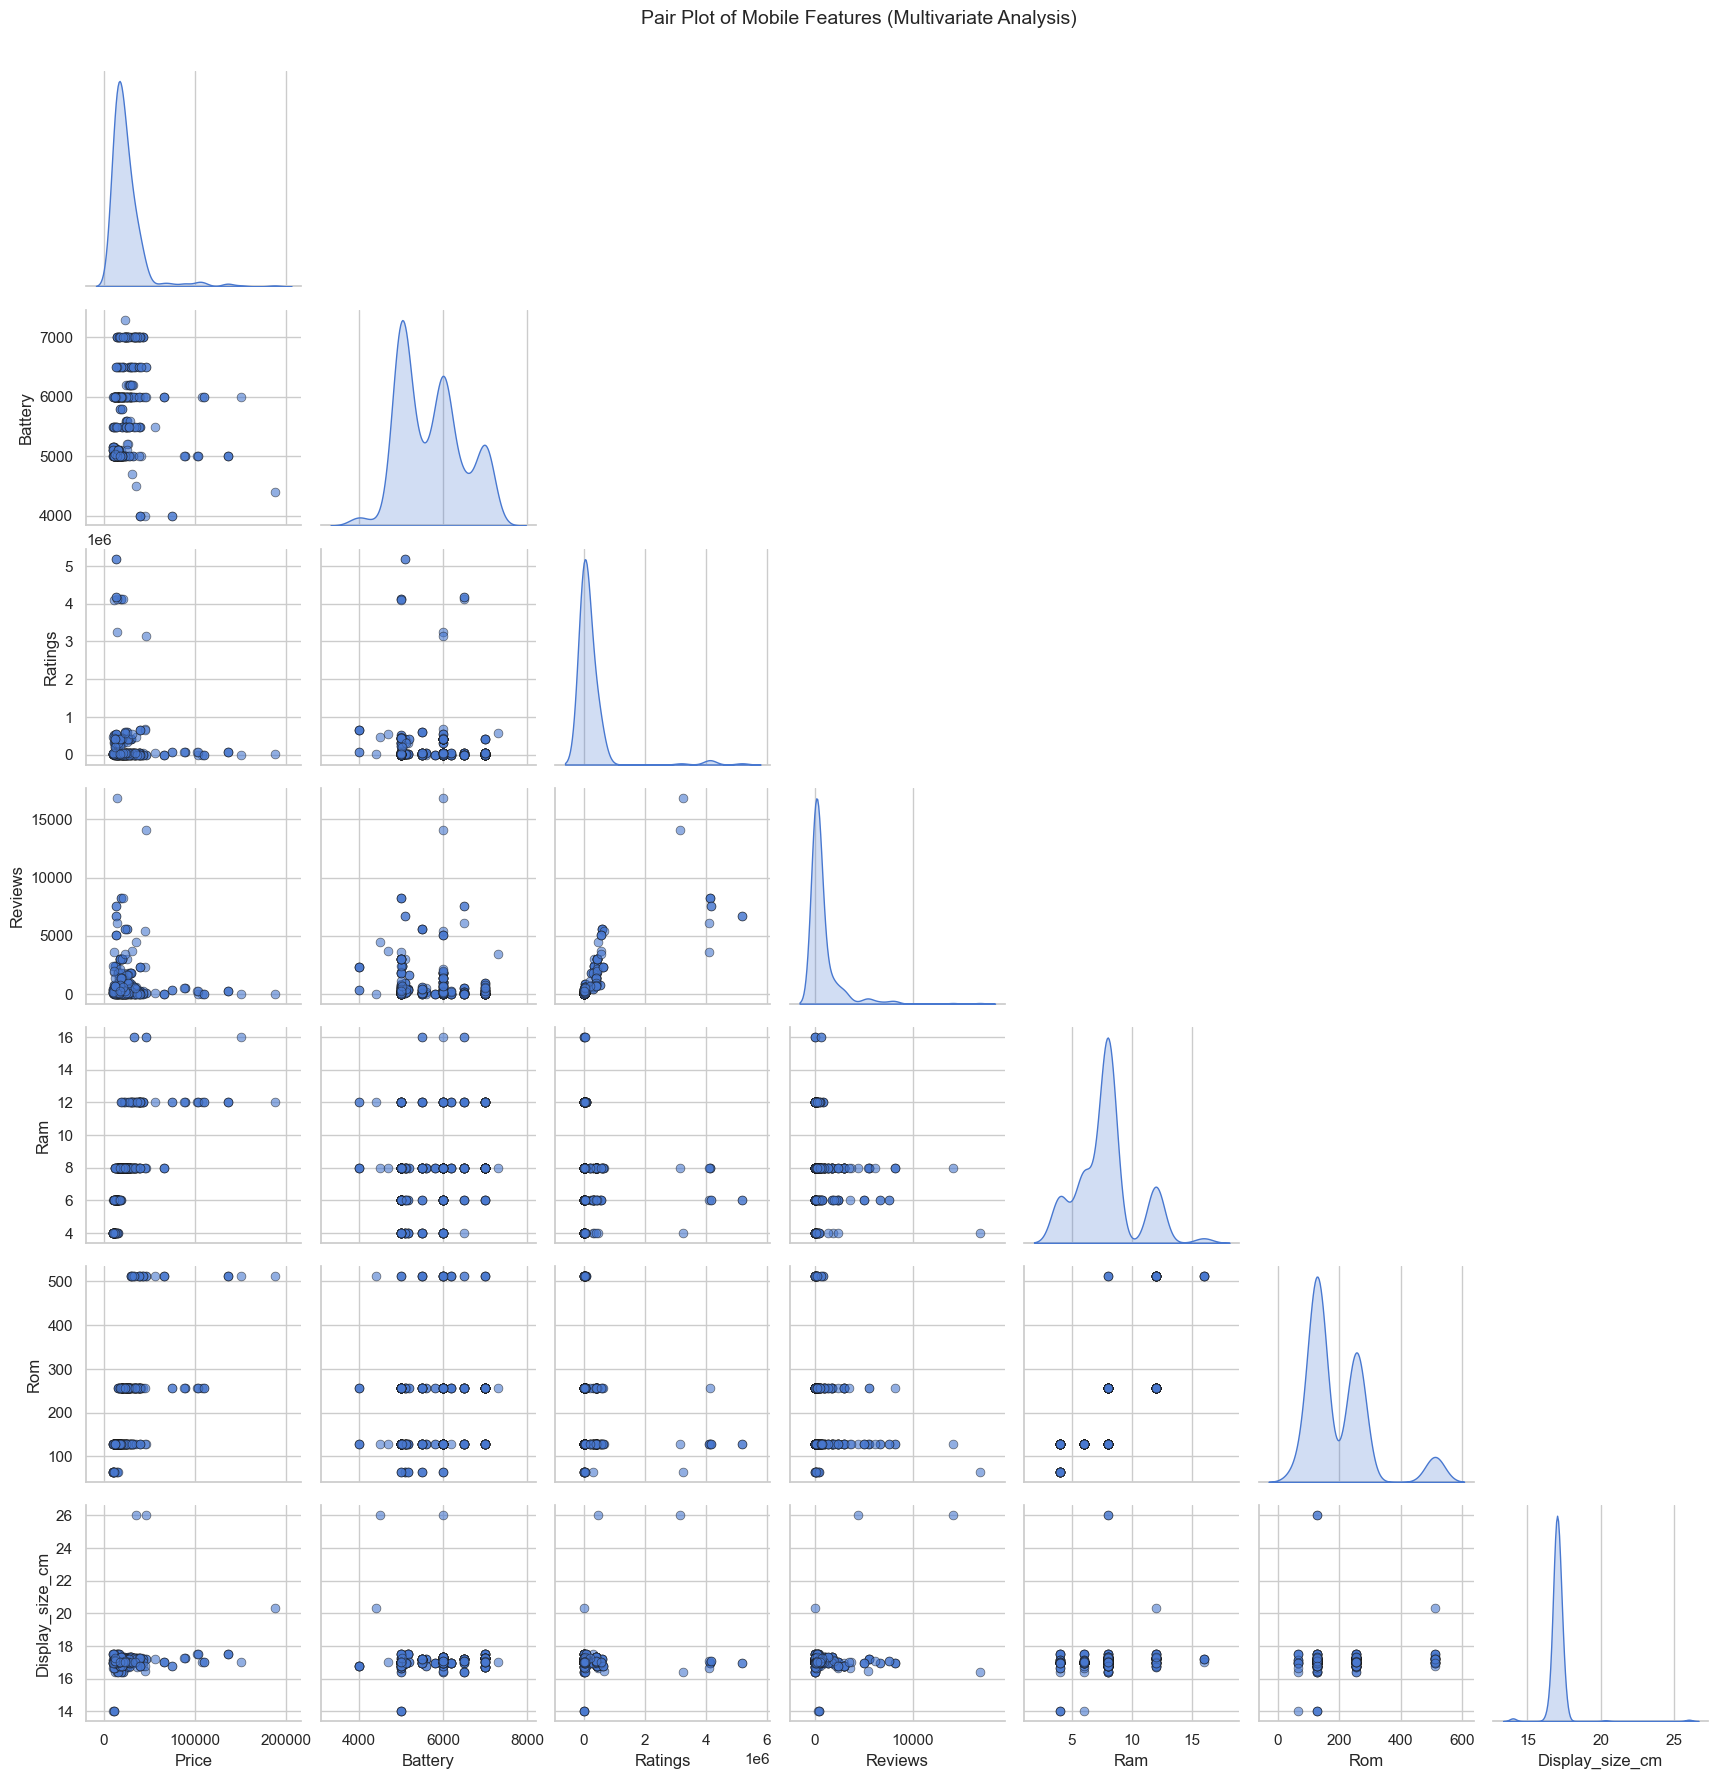

In [307]:
#MULTIVARIATE DISTRIBUTION
numeric_cols = ["Price", "Battery", "Ratings", "Reviews", "Ram", "Rom", "Display_size_cm"]

# Create pair plot
sns.pairplot(
    data=flipkart_data[numeric_cols],
    diag_kind="kde",      # KDE curve on diagonals instead of histograms
    corner=True,           # Show only lower triangle (avoids duplicate plots)
    plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'},  # Scatter style
)

plt.suptitle("Pair Plot of Mobile Features (Multivariate Analysis)", y=1.02, fontsize=14)
plt.show()

In [298]:
pd.crosstab(flipkart_data['Brand'], flipkart_data['Model'])

Model,12+ 5G,13 5G,13 5G Prime Edition,13 Pro+ 5G,13+ 5G,13c 5G,14 Pro 5G,14 Pro+ 5G,14C 5G,14x 5G,15 5G,15 Pro 5G,15T 5G,15x 5G,70 TURBO 5G,9 Power,A3,A3 Pro 5G,A3X,A3x,A3x 5G,A4 5G only on Jio SIM,A5 5G,A5 Pro 5G,A5x 5G,C63 5G Charger in the Box,C65 5G,C73 5G,C75 5G,F27 Pro+,F29 5G,F29 Pro 5G,F31 5G,F31 Pro 5G,F31 Pro+ 5G,GT 6,GT 7T,GT NEO 3 (150W),Galaxy A06,Galaxy A06 5G,Galaxy A16 5G,Galaxy A17 5G,Galaxy A35 5G,Galaxy A36 5G,Galaxy A55 5G,Galaxy A56 5G,Galaxy F16 5G,Galaxy F17 5G,Galaxy F36 5G,Galaxy M16 5G,Galaxy M33 5G,Galaxy M35 5G,Galaxy M55 5G,Galaxy M56 5G,Galaxy S21 FE 5G with Snapdragon 888,Galaxy S23 5G,Galaxy S23 FE,Galaxy S24 5G Snapdragon,Galaxy S24 FE 5G,Galaxy S24 Ultra 5G,Galaxy S25 5G,Galaxy S25 FE 5G,Galaxy S25 Ultra 5G,Galaxy Z Fold6 5G,Galaxy Z Fold7 5G,Gt 7,K12x 5G with 45W SUPERVOOC Charger In-The-Box,K13 Turbo 5G,K13 Turbo Pro 5G,K13x 5G 6000mAh and 45W SUPERVOOC Charger & AI,M06 5G,M36 5G,NARZO 80 Pro 5G,NARZO N65 5G,NOTE 14 PRO+ 5G,Narzo 80 Lite 5G,Narzo 80 Pro 5G,Narzo 80x 5G,Narzo N65 5G,Note 13 5G,Note 13 Pro 5G,Note 14 5G,Note 14 Pro 5G,Note 14 Pro+ 5G,Note 14 SE 5G,Note-14 Pro 5G,Note-14 Pro+ 5G,P3 5G,P3 Lite 5G Charger in the Box,P3 Pro 5G,P3 Ultra 5G,P3x 5G,P4 5G,P4 Pro 5G,RENO 13 5G,Reno13 5G,Reno14 5G,S25 Ultra 5G,T3 5G,T3 Lite 5G,T3 Pro 5G,T4 5G,T4 Pro 5G,T4 Ultra 5G,T4x 5G,V25 5G,V40 Pro 5G,V50 5G,V50e 5G,V60 5G,V60e,X Fold5 5G,Y19 5G,Y19e,Y22,Y29 5G,Y31 5G,Y31 Pro 5G,Y400 5G,Y400 Pro 5G
Brand,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Oppo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,5,0,3,4,5,0,0,0,0,3,1,4,5,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Realme,3,2,0,2,5,0,4,10,0,6,2,8,6,1,4,0,0,0,0,0,0,0,0,0,0,5,4,3,6,0,0,0,0,0,0,5,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,2,1,0,2,3,1,2,0,0,0,0,0,0,0,0,7,1,6,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Redmi,0,10,1,0,0,1,0,0,6,0,8,0,0,0,0,1,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,1,9,3,2,1,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Samsung,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,10,7,12,3,1,2,3,2,4,5,1,6,1,2,1,1,1,4,1,3,2,3,5,3,1,0,0,0,0,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Vivo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,4,1,6,4,3,1,1,6,3,6,4,1,8,1,2,1,3,4,4,4


In [ ]:
#Display size distribution across different brands

C:\Users\lakshmilokeswari\AppData\Local\Temp\ipykernel_16976\3456414455.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=flipkart_data, x=col, y="Display_size_cm", palette="coolwarm")


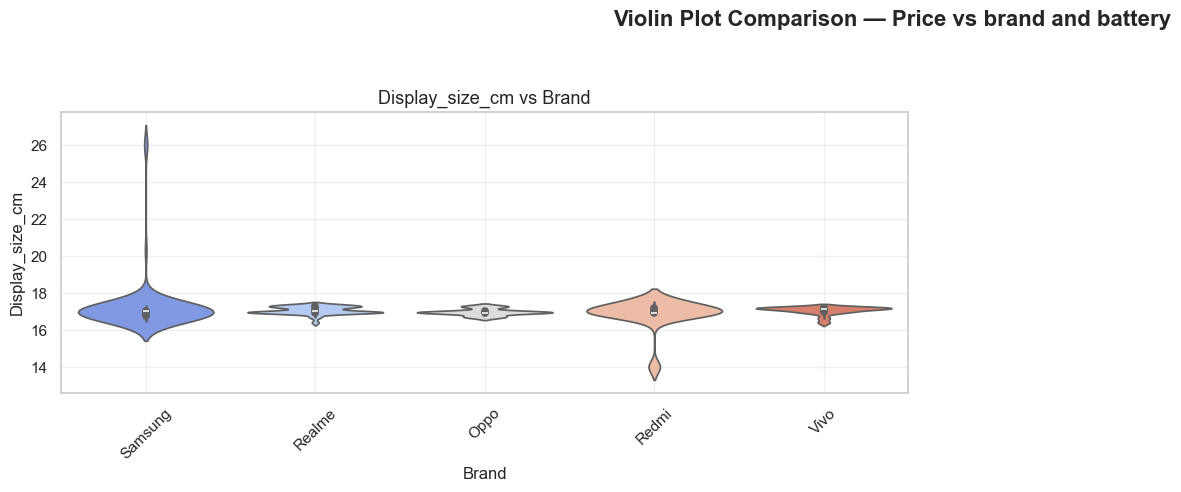

In [299]:
#BIVARIATE 
plt.figure(figsize=(18, 12))
plt.suptitle("Violin Plot Comparison — Price vs brand and battery", fontsize=16, fontweight='bold')
x_columns = ["Brand"]
for i, col in enumerate(x_columns, 1):
    plt.subplot(3, 2, i)
    sns.violinplot(data=flipkart_data, x=col, y="Display_size_cm", palette="coolwarm")
    plt.title(f"Display_size_cm vs {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Display_size_cm")
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

In [ ]:
#Insights

1. Brand Display Strategy:

Samsung targets users preferring larger displays, suitable for multimedia and premium experiences.

Redmi covers a broad range, catering to multiple consumer preferences.

Realme, Oppo, and Vivo focus on mid-sized displays, maintaining design consistency.



2. Market Segmentation:

Brands like Redmi and Samsung are more diversified in screen size offerings.

Realme and Vivo show less variation, possibly focusing on specific market tiers.



3. Consumer Implication:

Customers preferring bigger screens are more likely to find suitable options in Samsung and Redmi models.

Those preferring compact or moderate-sized phones may favor Realme or Vivo.





---


The violin plot reveals that Samsung and Redmi offer the widest range of display sizes, indicating diverse product lines targeting different customer needs. Samsung emphasizes larger displays, appealing to multimedia users, while Redmi provides balanced options across small to large screens. In contrast, Realme, Oppo, and Vivo maintain consistent mid-sized screens around 15–16 cm, showing uniform design strategies. Overall, the distribution suggests that display size differentiation is a key branding strategy for Samsung and Redmi, while other brands focus on standardization to maintain design and pricing consistency across their smartphone models.

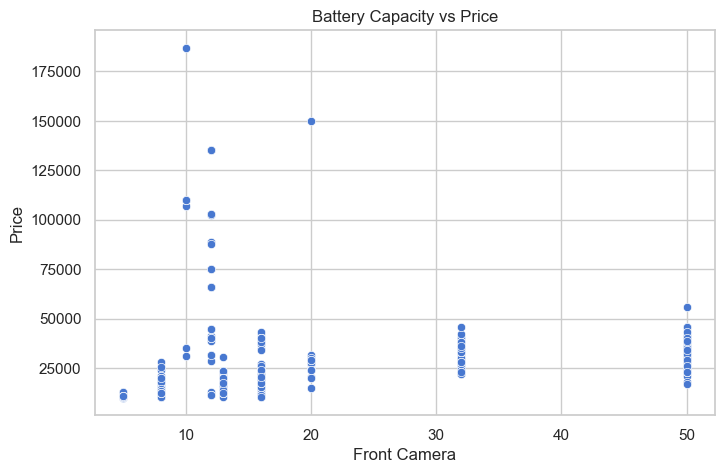

C:\Users\lakshmilokeswari\AppData\Local\Temp\ipykernel_16976\3195699870.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=flipkart_data, x=col, y="Price", palette="coolwarm")
C:\Users\lakshmilokeswari\AppData\Local\Temp\ipykernel_16976\3195699870.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=flipkart_data, x=col, y="Price", palette="coolwarm")
C:\Users\lakshmilokeswari\AppData\Local\Temp\ipykernel_16976\3195699870.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=flipkart_data, x=col, y="Price", palette="coolwarm")
C:\Users\lakshmilokeswari\AppData\Local\Temp\ipykernel_16976\3195699870.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=flipkart_data, x=col, y="Price", palette="coolwarm")


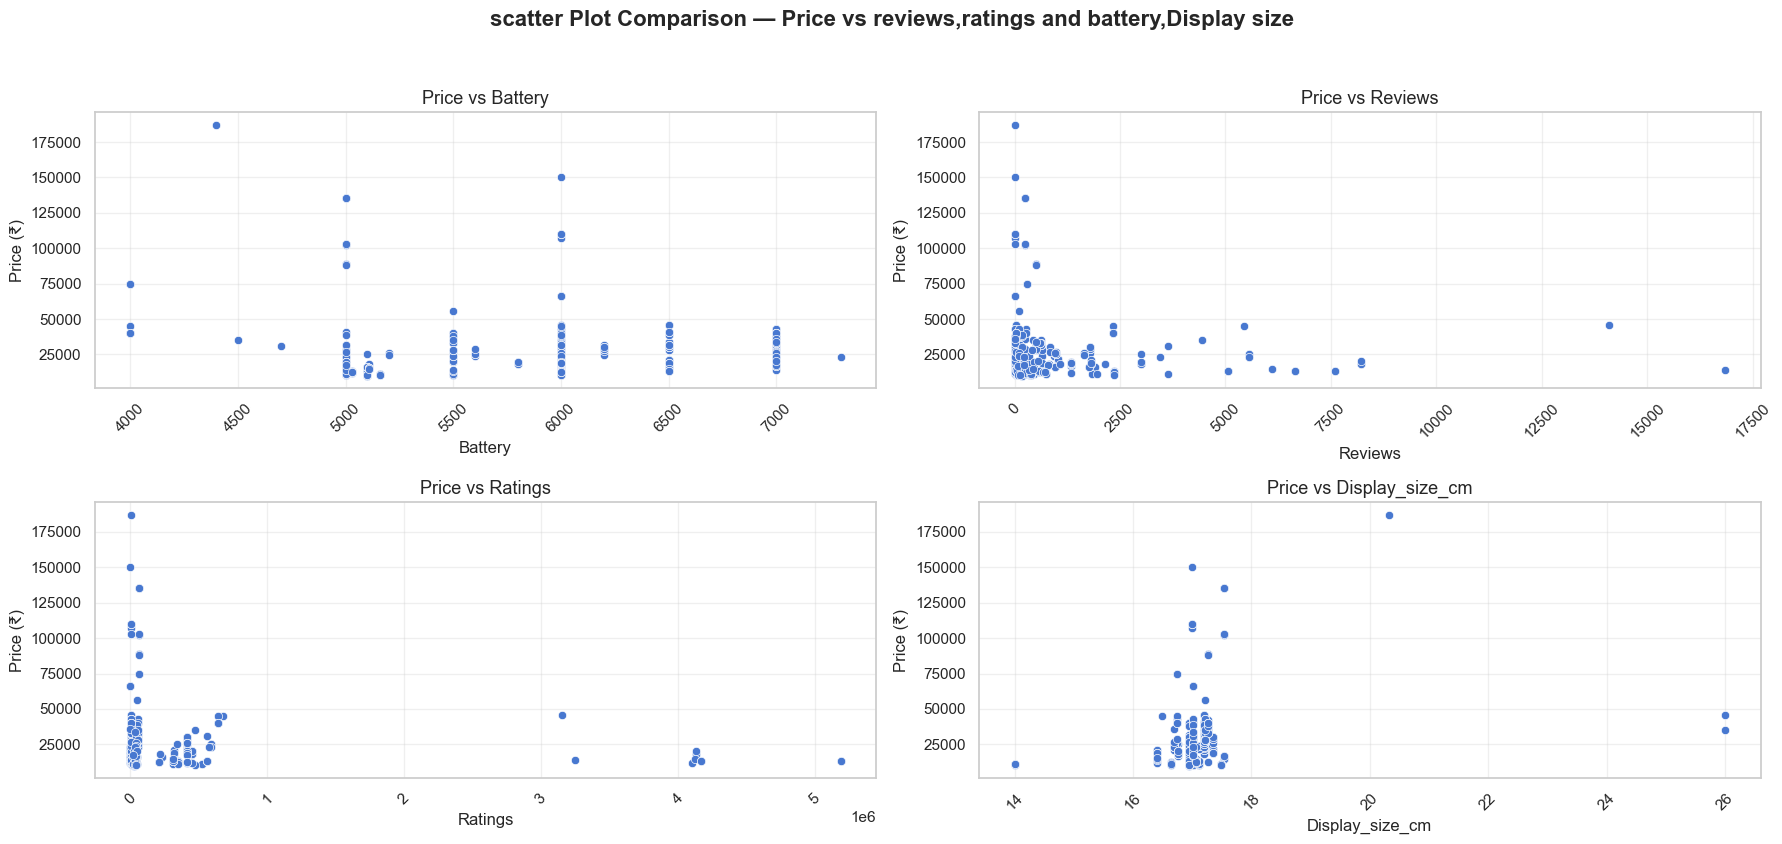

In [300]:
# Battery vs Price BIVARIATE
plt.figure(figsize=(8,5))
sns.scatterplot(x="Front Camera", y="Price", data=flipkart_data)
plt.title("Battery Capacity vs Price")
plt.show()

plt.figure(figsize=(18, 12))
plt.suptitle("scatter Plot Comparison — Price vs reviews,ratings and battery,Display size", fontsize=16, fontweight='bold')
x_columns = ["Battery", "Reviews","Ratings","Display_size_cm"]
for i, col in enumerate(x_columns, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=flipkart_data, x=col, y="Price", palette="coolwarm")
    plt.title(f"Price vs {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Price (₹)")
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

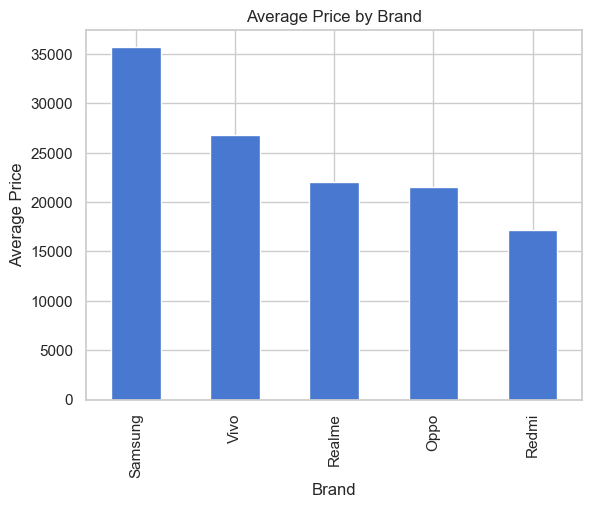

In [301]:
#BIVARIATE
avg_price = flipkart_data.groupby('Brand')['Price'].mean().sort_values(ascending=False)
avg_price.plot(kind='bar', title='Average Price by Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

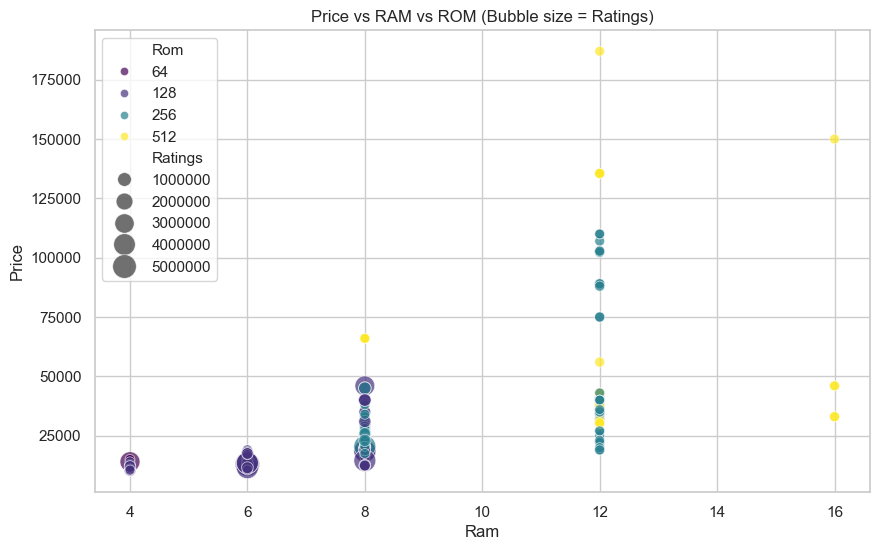

In [302]:

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=flipkart_data,
    x="Ram",
    y="Price",
    size="Ratings",
    hue="Rom",
    palette="viridis",
    sizes=(50,300),
    alpha=0.7
)
plt.title("Price vs RAM vs ROM (Bubble size = Ratings)")
plt.show()

In [ ]:
1. Price vs RAM:

Price increases with RAM — phones with 8 GB or more RAM generally fall in the higher price range.

Devices with 4 GB or 6 GB RAM are mostly in the ₹10,000–₹40,000 range.



2. Price vs ROM:

Phones with higher ROM (storage 256 GB, 512 GB, etc.) are concentrated in premium price categories (₹75,000+).

Phones with 64 GB or 128 GB ROM dominate the mid-range market.



3. Ratings (Bubble Size):

Larger bubbles (higher ratings) are visible more in the mid-range phones, not necessarily the most expensive ones.

Suggests that mid-priced phones provide better value for money and user satisfaction.



4. High-End Devices:

High RAM and ROM combinations (e.g., 12–16 GB RAM and 512 GB ROM) correspond to flagship models priced above ₹100,000.

Fewer such data points indicate that premium phones are less common in the dataset.





---

💡 Insights

1. Strong Positive Correlation:

Both RAM and ROM show a positive relationship with price — as performance specs increase, price rises accordingly.



2. Value Segment Performs Well:

Phones with 6–8 GB RAM and 128 GB ROM offer the best balance of performance, price, and customer satisfaction (higher ratings).



3. User Preferences:

Users seem more satisfied with mid-range phones rather than very high-end models, possibly due to better affordability and performance balance.



4. Market Distribution:

Most phones cluster between ₹10,000–₹60,000, indicating that this is the core price segment for popular smartphones.





---

✅ Conclusion (in ~100 words)

The bubble chart shows a clear upward trend between RAM, ROM, and price, meaning that higher specifications result in more expensive phones. However, user ratings (bubble size) are generally higher for mid-range phones, suggesting that consumers find better value in models with 6–8 GB RAM and 128 GB ROM. Premium phones with 12–16 GB RAM and higher storage are fewer and cost significantly more, reflecting niche demand. Overall, the visualization highlights that while performance specs drive price, customer satisfaction peaks in the affordable-to-mid performance range, not necessarily the flagship segment.

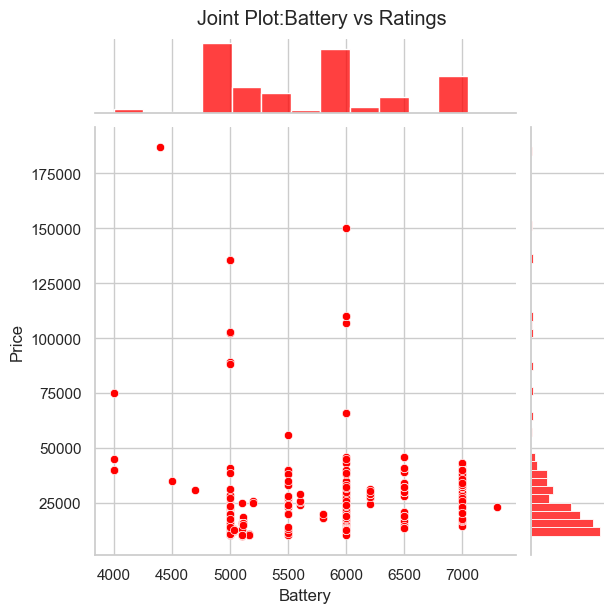

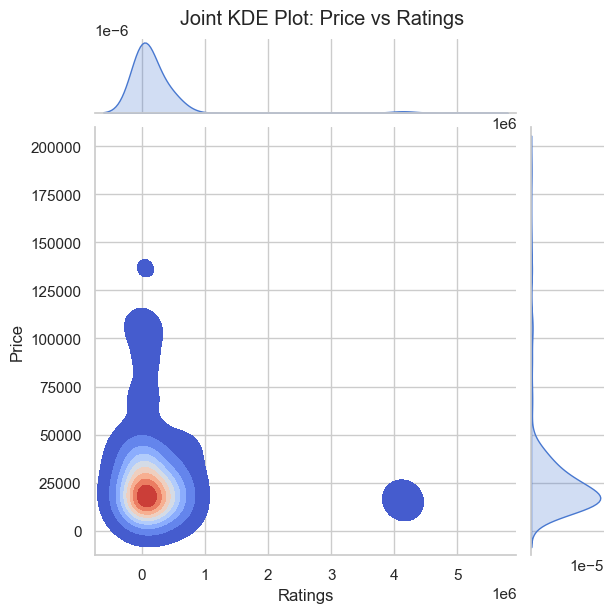

In [305]:
#BIVARIATE-NUM VS NUM
sns.jointplot(
    data=flipkart_data,
    x="Battery",
    y="Price",
    kind="scatter",
    color="Red"
)

plt.suptitle("Joint Plot:Battery vs Ratings", y=1.02)
plt.show()


sns.jointplot(
    data=flipkart_data,
    x="Ratings",
    y="Price",
    kind="kde",
    fill=True,
    cmap="coolwarm"
)

plt.suptitle("Joint KDE Plot: Price vs Ratings", y=1.02)
plt.show()


In [ ]:
. No Strong Correlation:

Battery capacity does not significantly affect the price of phones.

Even budget and mid-range phones often provide large batteries.



2. Market Standardization:

Around 5000 mAh has become a standard battery size across most brands and price ranges.



3. Consumer Expectation:

Buyers expect decent battery life across all price points, forcing brands to offer similar capacities even in budget models.



4. Premium Focus Shift:

Premium phones emphasize other specs (camera, processor, display) rather than increasing battery size.





---

Conclusion 

The joint plot shows that battery capacity and price have a weak relationship. Most smartphones, regardless of price, feature batteries between 4000–6000 mAh, with 5000 mAh being the most common. This suggests that large batteries are no longer exclusive to premium phones, as even affordable models offer comparable power. High-end devices priced above ₹100,000 often maintain moderate battery sizes, focusing more on performance and design. Overall, battery size has become a standardized feature across segments, indicating that it’s not a major differentiating factor in smartphone pricing or perceived value.

In [ ]:
1. Budget Phones Dominate:

Majority of phones priced between ₹10,000 and ₹30,000 receive high user satisfaction, reflecting strong value-for-money performance.



2. Premium Phones Are Fewer:

Expensive phones are limited in number and don’t necessarily have proportionally higher ratings.



3. Value Perception:

Customers appear to rate mid-range phones more favorably, possibly due to expectations being met at lower cost.



4. Ratings Stability:

Across all prices, ratings remain relatively stable around 4–4.5, showing that price isn’t a major driver of satisfaction.





---

Conclusion 

The joint KDE plot reveals that most smartphones cluster in the ₹10,000–₹30,000 price range, with consistently high ratings (around 4–5). This suggests that users are most satisfied with budget and mid-range models, which offer strong value for money. Premium phones above ₹75,000 are relatively few and do not show significantly higher ratings, indicating that higher cost doesn’t guarantee higher satisfaction. Overall, the data highlights that price has little direct influence on user ratings, and mid-range phones dominate the market in both availability and customer approval.

C:\Users\lakshmilokeswari\AppData\Local\Temp\ipykernel_16976\4097617699.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(


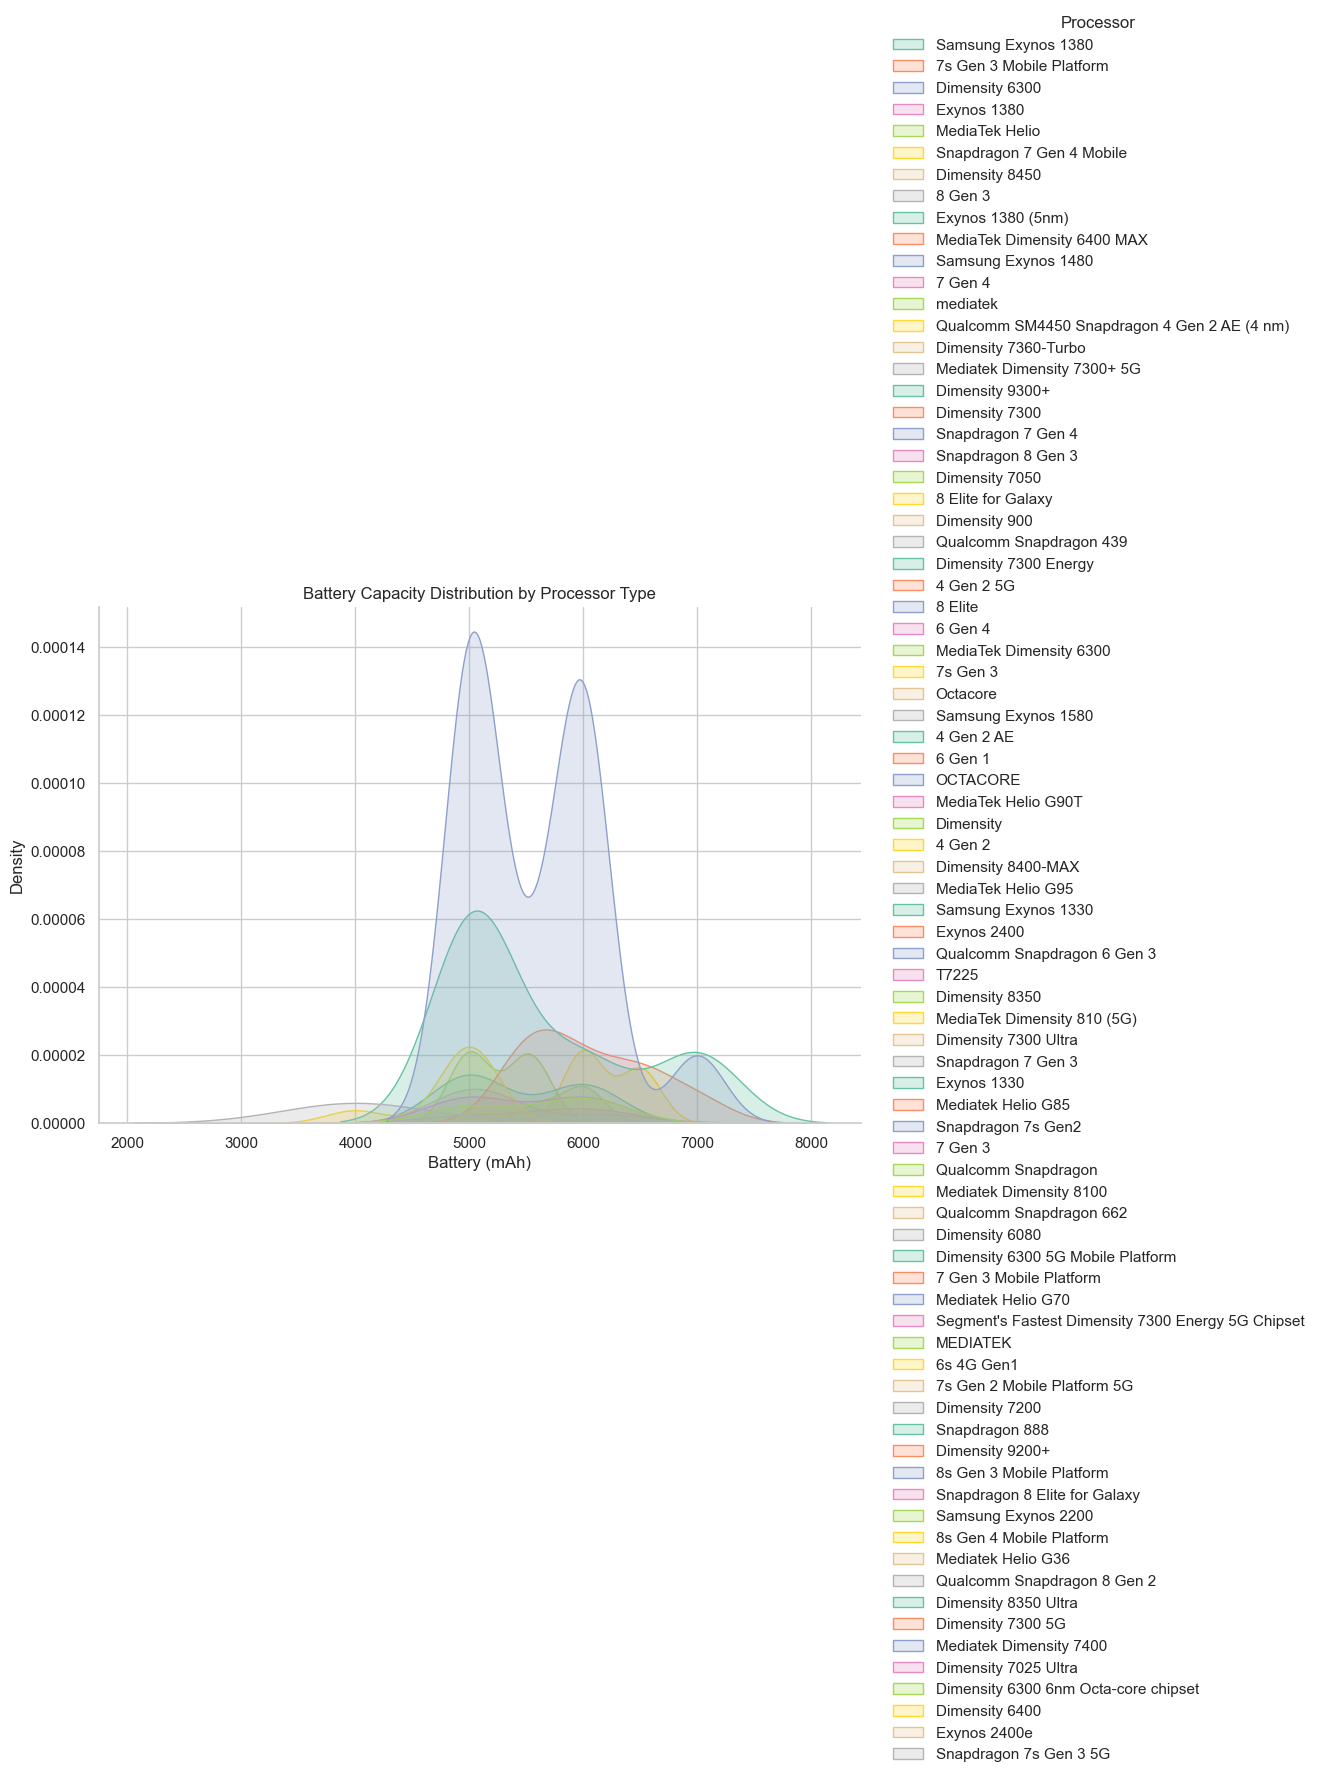

In [306]:
#BIVARIATE
sns.displot(
    data=flipkart_data,
    x="Battery",
    hue="Processor",
    kind="kde",
    fill=True,
    height=6,
    aspect=1.5,
    palette="Set2"
)

plt.title("Battery Capacity Distribution by Processor Type")
plt.xlabel("Battery (mAh)")
plt.ylabel("Density")
plt.show()

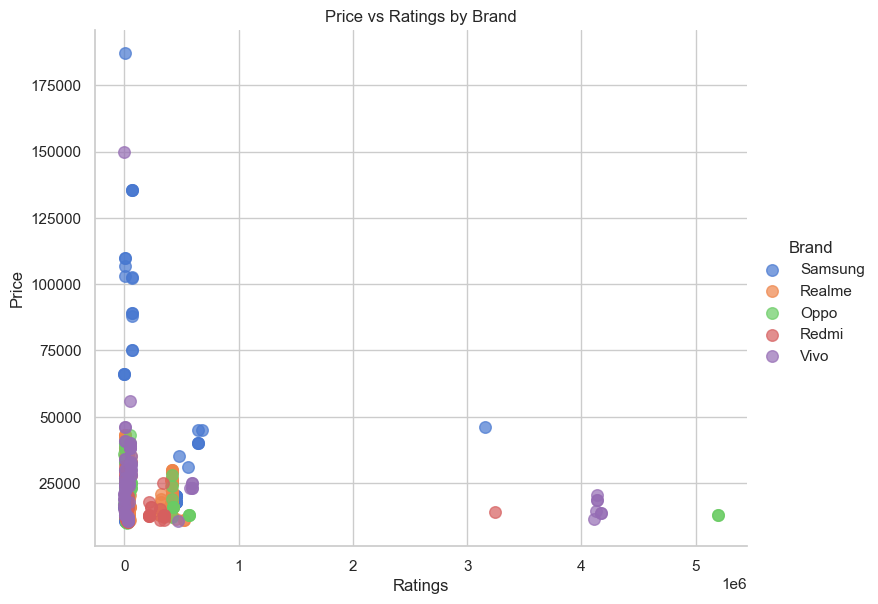

In [308]:
sns.lmplot(
    data=flipkart_data,
    x="Ratings",
    y="Price",
    hue="Brand",
    fit_reg=False,
    height=6,
    aspect=1.3,
    scatter_kws={'alpha':0.7, 's':70}
)
plt.title("Price vs Ratings by Brand")
plt.show()

In [ ]:
Insights

1. Budget and Mid-Range Phones Dominate:

Most brands have a strong presence below ₹40,000, reflecting consumer preference for affordable models.



2. High Ratings Are Not Price-Dependent:

Even low-priced phones (especially from Redmi and Realme) have high ratings, showing that value and performance matter more than price.



3. Brand Positioning:

Samsung spans all price tiers but faces competition from Redmi and Realme in the mid-range due to similar or better ratings at lower prices.



4. User Satisfaction:

Redmi and Realme consistently achieve higher ratings, suggesting strong consumer trust in budget-friendly performance.





---

Conclusion 

The scatter plot shows that Redmi and Realme dominate the mid-range smartphone segment, earning high ratings despite lower prices. Samsung covers all price categories, including premium models, but its ratings are similar to those of mid-range competitors, indicating that higher cost doesn’t guarantee better user satisfaction. Oppo and Vivo also perform well in the mid-tier market with steady ratings. Overall, the data suggests that affordable smartphones deliver comparable quality and satisfaction to high-end models, highlighting a strong consumer preference for value-driven brands like Redmi and Realme in the Indian smartphone market.

C:\Users\lakshmilokeswari\AppData\Local\Temp\ipykernel_16976\3231945676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_processor_price.values, y=avg_processor_price.index, palette="coolwarm")


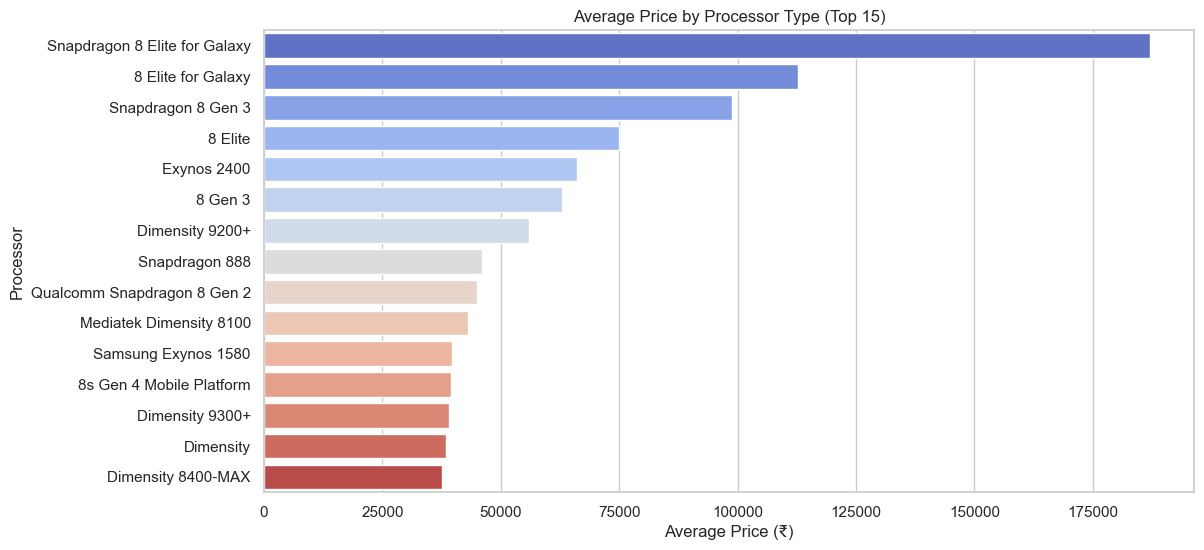

In [309]:
#BIVARIATE
plt.figure(figsize=(12,6))
avg_processor_price = flipkart_data.groupby("Processor")["Price"].mean().sort_values(ascending=False).head(15)
sns.barplot(x=avg_processor_price.values, y=avg_processor_price.index, palette="coolwarm")
plt.title("Average Price by Processor Type (Top 15)")
plt.xlabel("Average Price (₹)")
plt.ylabel("Processor")
plt.show()

C:\Users\lakshmilokeswari\AppData\Local\Temp\ipykernel_16976\3711351181.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values, y=avg_rating.index, palette="magma")


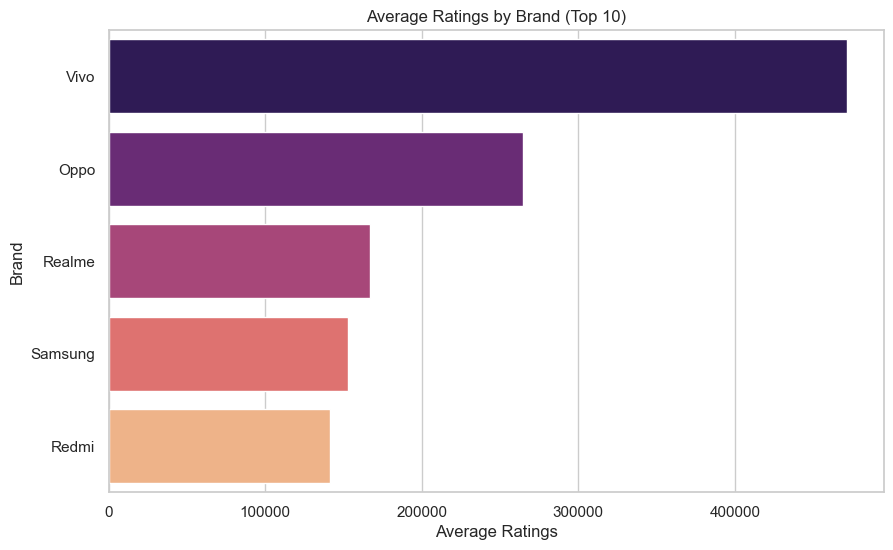

In [310]:
#BIVARIATE
plt.figure(figsize=(10,6))
avg_rating = flipkart_data.groupby("Brand")["Ratings"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette="magma")
plt.title("Average Ratings by Brand (Top 10)")
plt.xlabel("Average Ratings")
plt.ylabel("Brand")
plt.show()

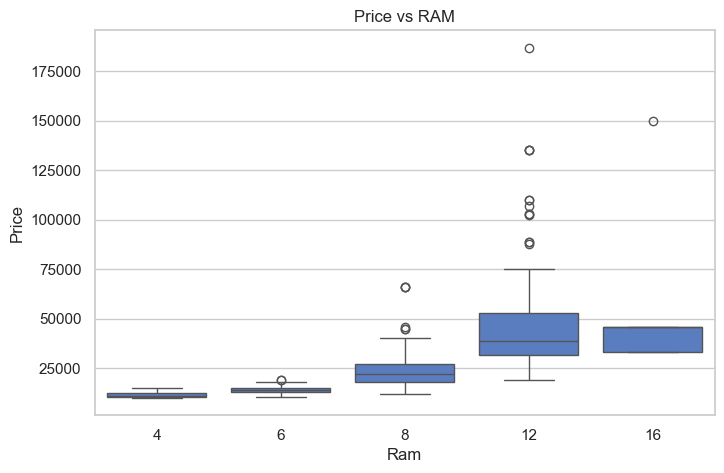

In [316]:

plt.figure(figsize=(8,5))
sns.boxplot(x="Ram", y="Price", data=flipkart_data)
plt.title("Price vs RAM")
plt.show()

In [ ]:
1. Clear Positive Correlation:

Higher RAM → Higher Price, showing that RAM significantly impacts smartphone pricing.



2. Market Segmentation:

4GB–6GB → Budget range.

8GB–12GB → Mid to upper mid-range.

16GB → Premium flagship segment.



3. Pricing Consistency:

Budget phones have narrow price variation, while high-RAM phones show broader price spread due to premium features and brand value.



4. Outliers:

A few high-priced 8GB or 12GB models suggest that factors like brand reputation and processor quality also influence price beyond RAM size.





---

Conclusion 

The boxplot reveals a strong positive relationship between RAM capacity and smartphone price. Phones with 4GB to 6GB RAM dominate the budget category, priced below ₹25,000, while 8GB to 12GB RAM devices span the mid to high-end range. Premium phones with 16GB RAM are rare and significantly more expensive, often exceeding ₹1,00,000. This indicates that RAM is a key determinant of smartphone pricing, with higher memory configurations appealing to performance-oriented and premium users. Overall, the plot highlights a clear trend — as RAM increases, price escalates proportionally, reflecting device capability and target market segmentation.

In [ ]:
#conclusion:
Mid-range smartphones are the most popular on Flipkart.
Price increases with higher RAM, ROM, and advanced processor types.
Snapdragon 8 series and Exynos 2400 dominate the premium segment.
Battery capacity and display size moderately impact the overall price.
#Overall Insight:
Flipkart’s smartphone market shows a clear pattern — as performance specifications like RAM, ROM, and processor quality improve, the prices rise significantly. High-end phones attract more attention, while mid-range models remain the top-selling category.
